In [1]:
import matplotlib.pyplot as plt
import numpy as np

from trendfilterpy._estimator import TrendFilterRegression, TrendFilterRegressionCV

rng = np.random.default_rng()

In [ ]:
n = 10000
X = np.hstack([rng.integers(-100, 100, size=(n, 1)) / 10, rng.integers(-250, 250, size=(n, 1)) / 250])
true_y = 5 + np.sin(X[:, 0]) + np.exp(X[:, 1])
obs_y = true_y + 0.5 * rng.standard_normal(n)

# Standard Fit

In [3]:
model = TrendFilterRegression(lam=0.01)
model.fit(X, obs_y)

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) Jun 09 01:35:24 PM: Your problem has 701 variables, 2 constraints, and 0 parameters.
(CVXPY) Jun 09 01:35:24 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 09 01:35:24 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 09 01:35:24 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 09 01:35:24 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 09 01:35:24 PM: Compiling problem (target solver=CLARABEL).

TrendFilterRegression(lam=0.01)

Text(0, 0.5, 'Linear Predictor')

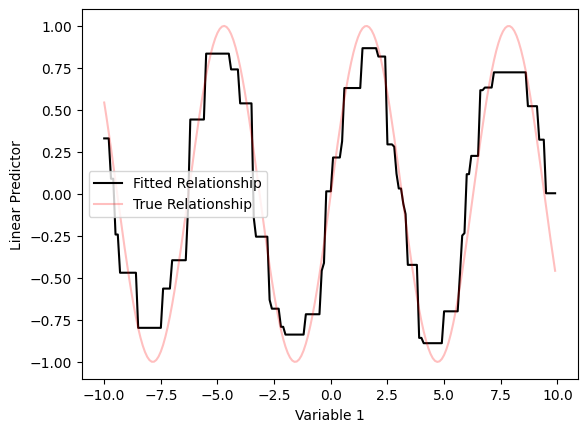

In [4]:
var = model.vars_[0]
plt.plot(var.unique_vals, var.beta, color="black")
plt.plot(var.unique_vals, np.sin(var.unique_vals), alpha=0.25, color="red")
plt.legend(["Fitted Relationship", "True Relationship"])
plt.xlabel("Variable 1")
plt.ylabel("Linear Predictor")

Text(0, 0.5, 'Linear Predictor')

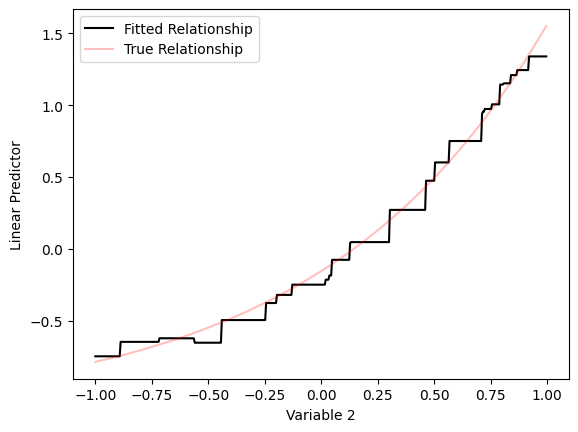

In [5]:
var = model.vars_[1]
plt.plot(var.unique_vals, var.beta, color="black")
# Make adjustment for identifiability
plt.plot(var.unique_vals, np.exp(var.unique_vals) - (model.intercept_ - 5), alpha=0.25, color="red")
plt.legend(["Fitted Relationship", "True Relationship"])
plt.xlabel("Variable 2")
plt.ylabel("Linear Predictor")

In [6]:
model.score(X, obs_y)

0.12916156726083383

# Cross Validation

In [ ]:
model = TrendFilterRegressionCV(lams=np.logspace(-5, 5, 100).tolist())
test = model.fit(X, obs_y)

CV Fold: 1
{np.float64(13796.393271336921)}
{np.float64(13793.65920915409)}
{np.float64(13790.200788116355)}
{np.float64(13785.811153091745)}
{np.float64(13780.281796917934)}
{np.float64(13773.331450360578)}
{np.float64(13764.564722088227)}
{np.float64(13753.44621913971)}
{np.float64(13739.569299731931)}
{np.float64(13722.396559706891)}
{np.float64(13701.285419837044)}
{np.float64(13675.246844428983)}
{np.float64(13643.220817950216)}
{np.float64(13604.720050933473)}
{np.float64(13557.793889950643)}
{np.float64(13501.913292759313)}
{np.float64(13438.986091201663)}
{np.float64(13368.588151930278)}
{np.float64(13284.6099174791)}
{np.float64(13196.261498104785)}
{np.float64(13099.42453273688)}
{np.float64(12989.980460902352)}
{np.float64(12881.158223590115)}
{np.float64(12776.366144364163)}
{np.float64(12687.896780010322)}
{np.float64(12620.817989604613)}
{np.float64(12580.181048774994)}
{np.float64(12546.031781741112)}
{np.float64(12524.983472874932)}
{np.float64(12519.270751225718)}
{np.

Text(0, 0.5, 'Linear Predictor')

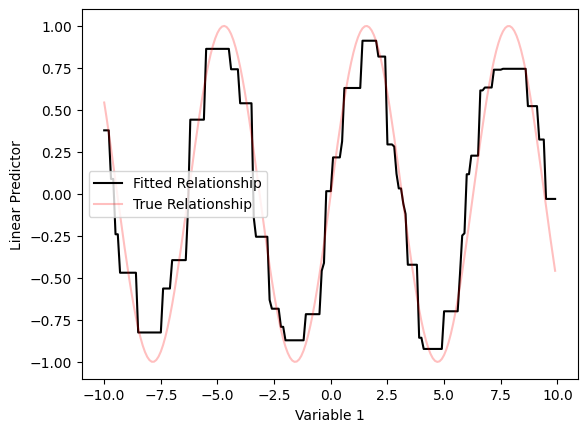

In [8]:
var = model.vars_[0]
plt.plot(var.unique_vals, var.beta, color="black")
plt.plot(var.unique_vals, np.sin(var.unique_vals), alpha=0.25, color="red")
plt.legend(["Fitted Relationship", "True Relationship"])
plt.xlabel("Variable 1")
plt.ylabel("Linear Predictor")

In [9]:
model.best_lam_

np.float64(0.008497534359086439)